이산형 확률분포

In [73]:
# 1차원 이산확률분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
X = [x_set, f]

In [74]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

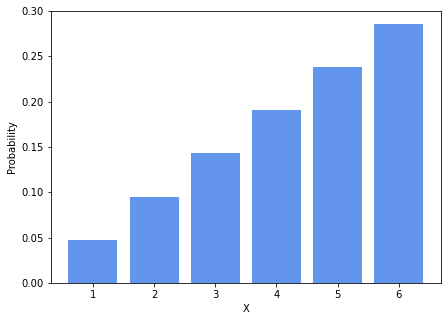

In [75]:
plt.figure(figsize=(7,5))
plt.bar(x_set, prob, color= 'cornflowerblue')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()


Text(0.5, 1.0, 'Bar Graph')

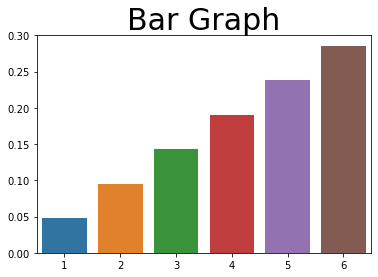

In [76]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)

In [77]:
np.all(prob>=0)

True

In [78]:
np.sum(prob)

0.9999999999999999

In [79]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [80]:
F(6)

0.9999999999999999

In [81]:
# 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [82]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부른다.
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [83]:
sample=np.random.choice(x_set, int(1e6),p=prob)
np.mean(sample)

4.333632

In [84]:
#일반화
def E(X,g=lambda x:x):
    x_set,f=X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])


In [85]:
E(X)

4.333333333333333

In [86]:
E(X,g=lambda x:2*x+3)

11.666666666666664

In [89]:
#기댓값의 선형성
2 * E(X) + 3

11.666666666666666

In [90]:
#분산
mean=E(X)
np.sum([(x_k-mean)**2*f(x_k) for x_k in x_set])

2.2222222222222223

In [91]:
#일반화
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [92]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [93]:
#분산의 공식
2**2*V(X)

8.88888888888889

In [94]:
# 2차원 이산형 확률 분포
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [95]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [96]:
XY = [x_set, y_set, f_XY]

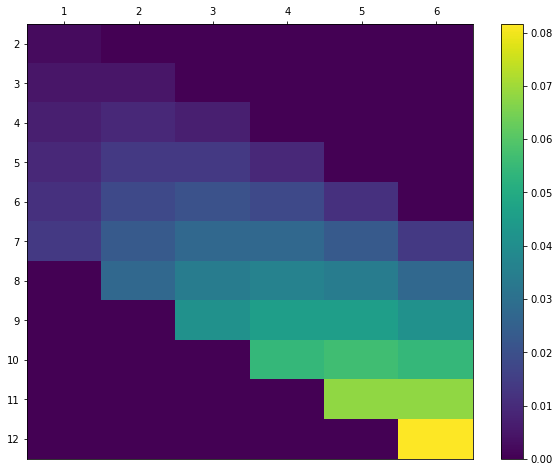

In [97]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [98]:
np.all(prob>=0)


True

In [99]:
np.sum(prob)

1.0

In [ ]:
#주변확률분포 : 확률변수(X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별확률변수에만 흥미가 있을 수 있다. 확률변수 x만의 움직임. 즉 확률변수 x의 확률함수를 알고 싶은 상황

In [100]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [101]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [102]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [103]:
X,Y

([array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
  <function __main__.f_X(x)>],
 [array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>])

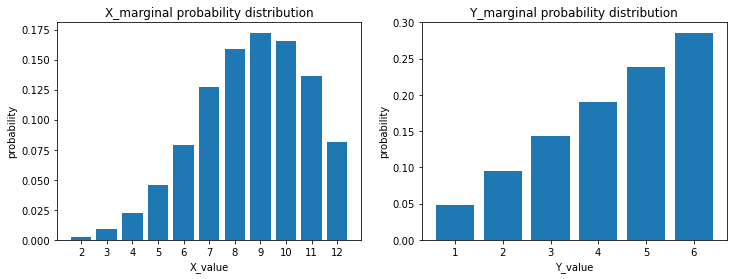

In [104]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [ ]:
# 2차원 이산형 확률분포의 지표

In [105]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [117]:
lst=[]
for x_i in x_set:
    for y_j in y_set:
        lst.append(x_i * f_XY(x_i, y_j))
np.sum(lst)

8.666666666666666

In [118]:
sum=0
for x_i in x_set:
    for y_j in y_set:
        sum+=(x_i * f_XY(x_i, y_j))
sum

8.666666666666666

In [133]:
def E(XY,g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])
E(XY, lambda x, y: x)


8.666666666666666

In [132]:
E(XY, lambda x, y: y)

4.333333333333333

In [135]:
a, b = 2, 3

In [137]:
#기댓값의 선형성
E(XY, lambda x, y:a*x+b*y)

30.333333333333332

In [138]:
#분산 :X의 분산이라면 X에 관한 편차제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [139]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])
cox_xy=Cov(XY)
cox_xy

2.222222222222222

In [145]:
Cov(XY)

2.222222222222222

In [144]:
#공분산

In [48]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [49]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [50]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474

In [142]:
#대표적인 이산형 확률분포

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean',color='crimson')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

<img src='bern.jpg'>

In [151]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [152]:
p = 0.3
X = Bern(p)

In [153]:
check_prob(X)

expected value 0.3
variance 0.21


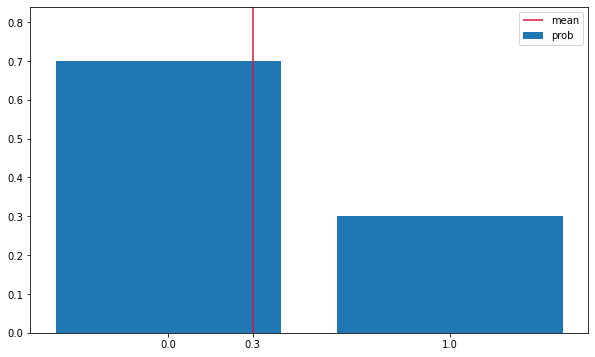

In [156]:
plot_prob(X)

In [157]:
rv = stats.bernoulli(p)

In [159]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [160]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [164]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [163]:
rv.mean(), rv.var()

(0.3, 0.21)

In [165]:
#이항분포 성공확률이 p인 베르누이 시행을 n번했을때 성공횟수가 따르는 분포

In [168]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

n = 10
p = 0.3
X = Bin(n, p)
check_prob(X)

expected value 3.0
variance 2.1


#### 기하분포
- 베르누이 시행에서 처음 성공할 때 까지 반복한 새행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x)=$(1-p)^{x-1}p$ $(x \in \{1,2,3...\})$

- 기하 분포의 기댓값과 분산 : E(X) = 1/p, V(X)= (1-p)/$p^2$